In [480]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
# sns.set_theme()
warnings.filterwarnings('ignore')

In [481]:
os.getcwd()

'c:\\Users\\Rashid\\Desktop\\UKDlDs\\SelfCode\\simple linear regression'

In [482]:
# os.chdir(f"{os.getcwd()}\{[x.name for x in os.scandir() if x.is_dir()][-1]}")

In [483]:
df = pd.read_csv(rf'{os.getcwd()}\{os.listdir()[0]}')

In [484]:
# glob.glob("*.csv")
# [x for x in os.listdir() if x.endswith(('csv','txt'))]

In [485]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [486]:
df_copy = df.iloc[:,3:]

In [487]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    object 
 11  Region       243 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 22.9+ KB


In [488]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [489]:
df_copy.Classes.value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [490]:
# np.where(df_copy.Classes.str.contains('not fire'),0,1)

In [491]:
df_copy['Classes'] = np.where(df_copy.Classes.str.contains('not fire'),0,1)

In [492]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [493]:
X = df_copy.drop('FWI',axis=1)
y = df_copy['FWI']

In [494]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [495]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [496]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [497]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [498]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


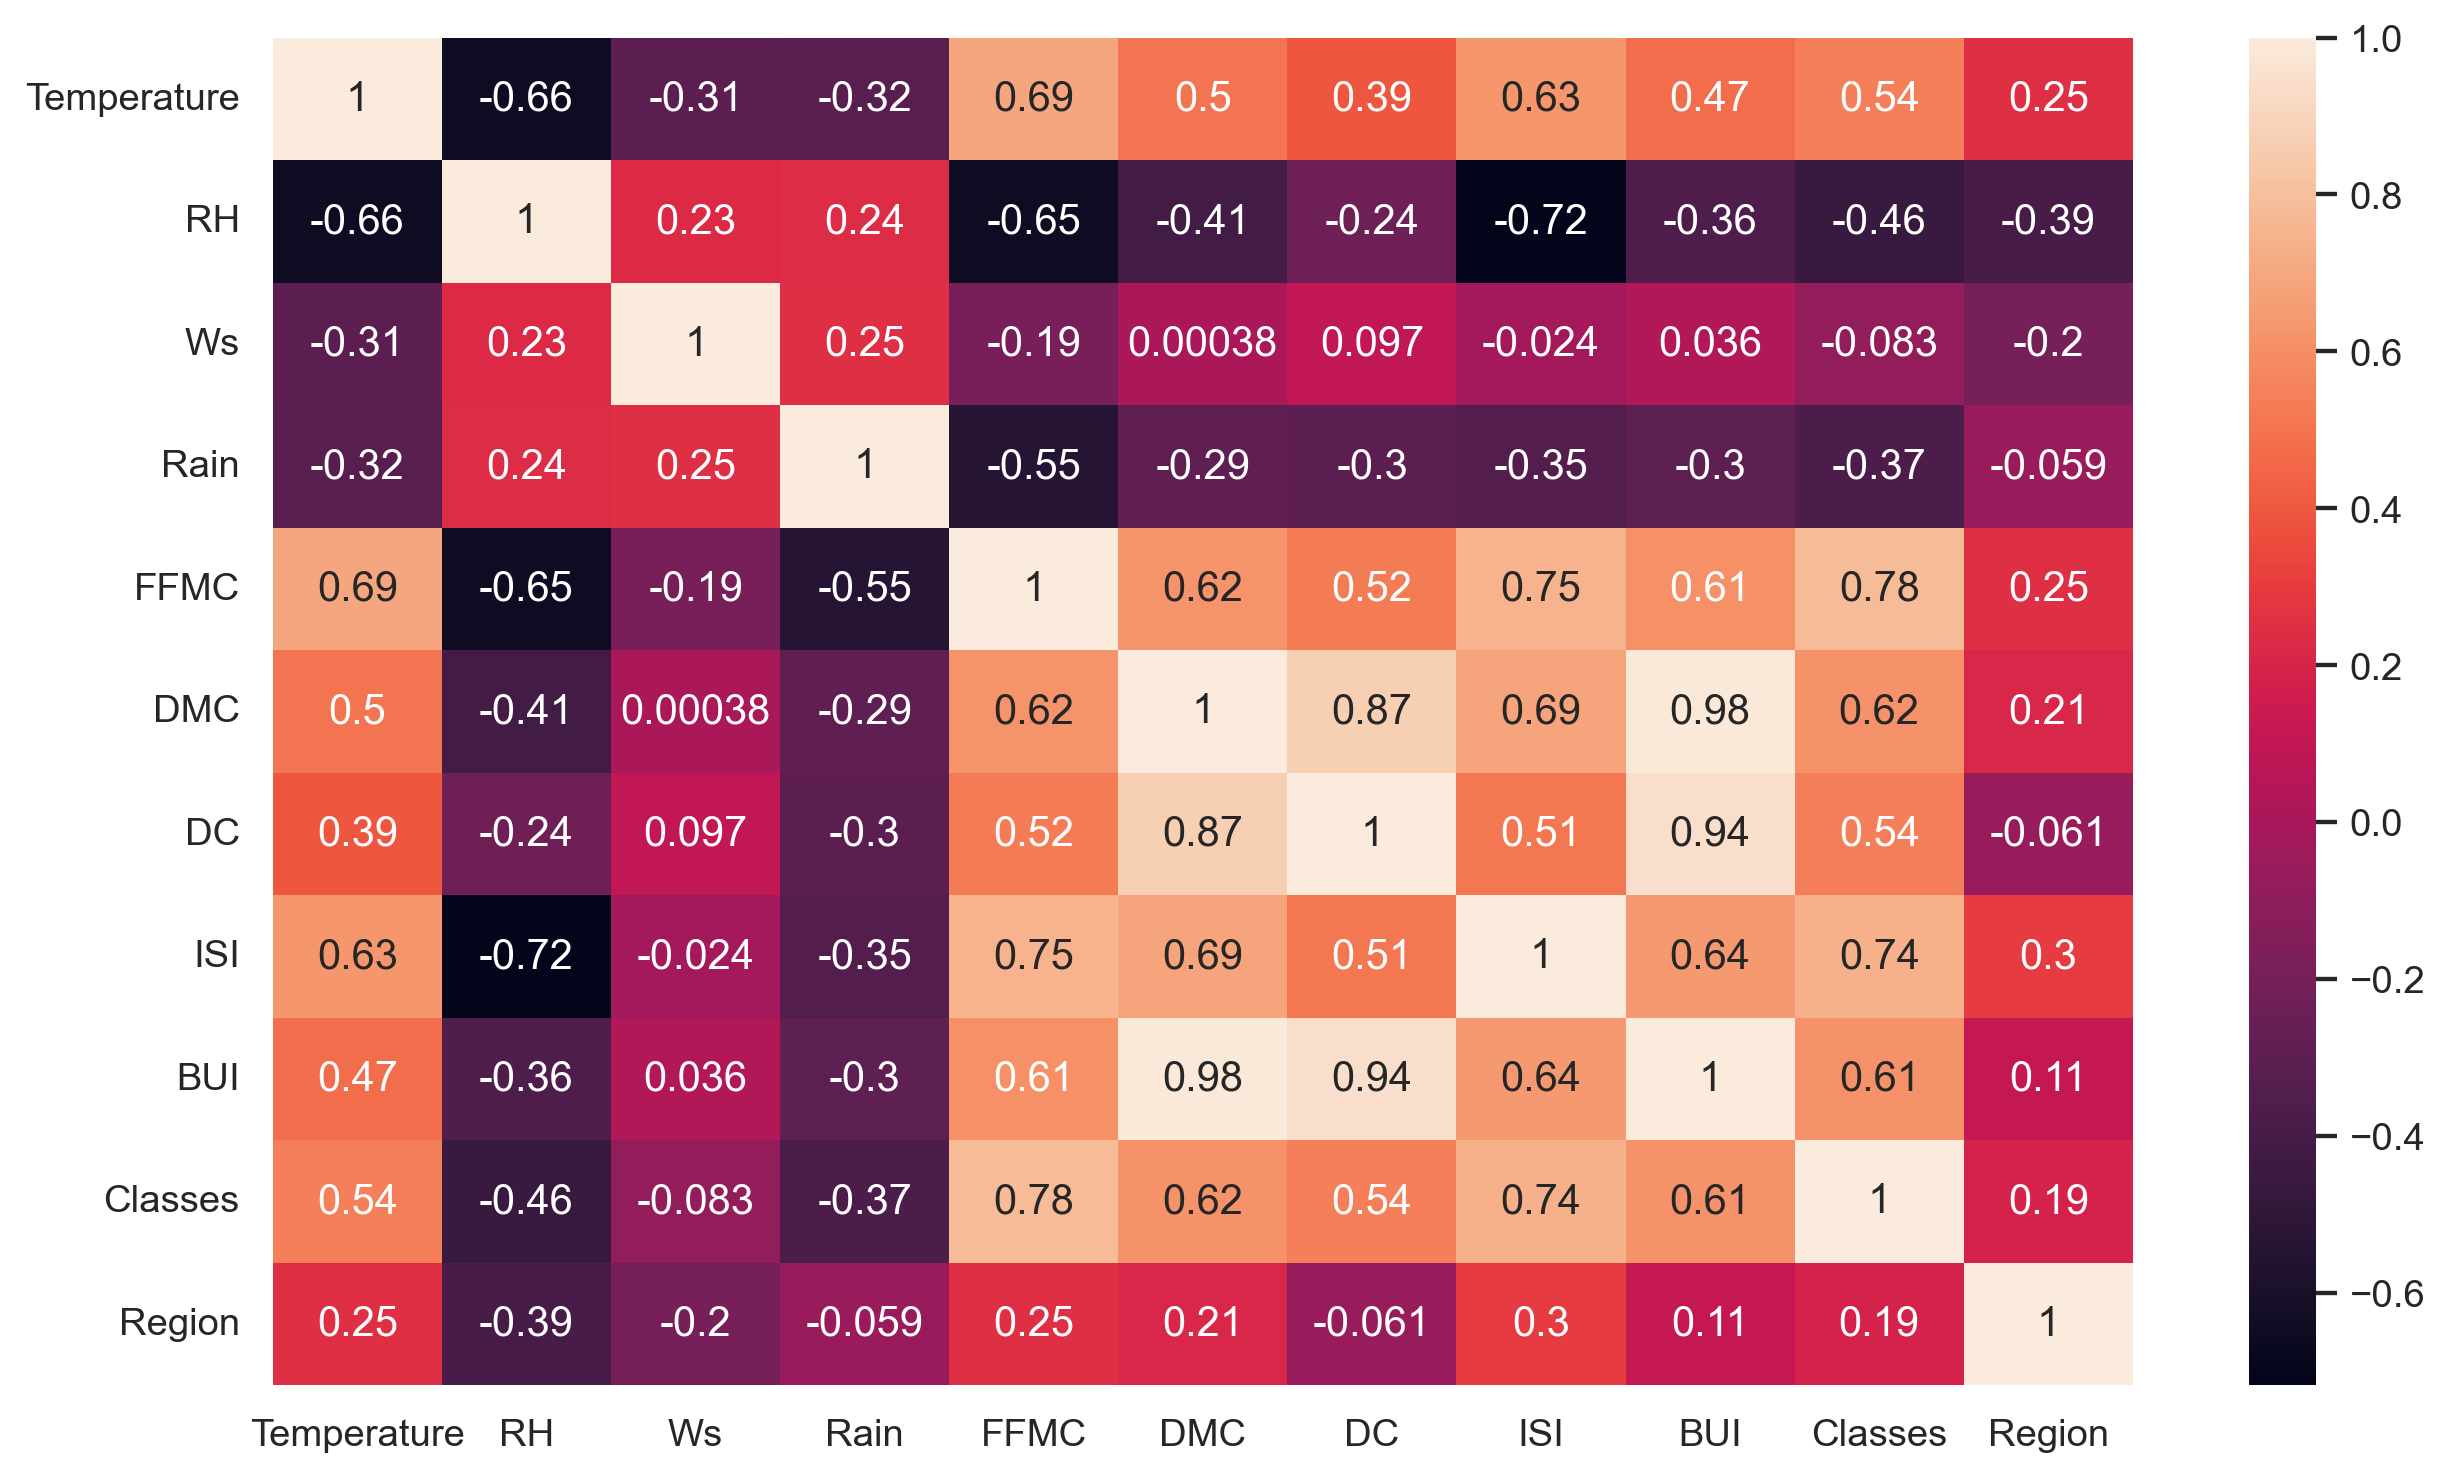

In [499]:
plt.figure(figsize=(12,7),dpi=250.0)
sns.heatmap(X_train.corr(),annot=True)
plt.autoscale(enable=True)
plt.show()

In [500]:
def correlation(dataset,threshold):
    colname = []
    for i in range(len(dataset.corr())):
        for j in range(i):
            if abs(X_train.corr().iloc[i,j]) > threshold:
                colname.append(X_train.corr().columns[i])
    return set(colname)

In [501]:
corr_features=correlation(X_train,0.85)

In [502]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

X_train.shape,X_test.shape

((182, 9), (61, 9))

In [503]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [504]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

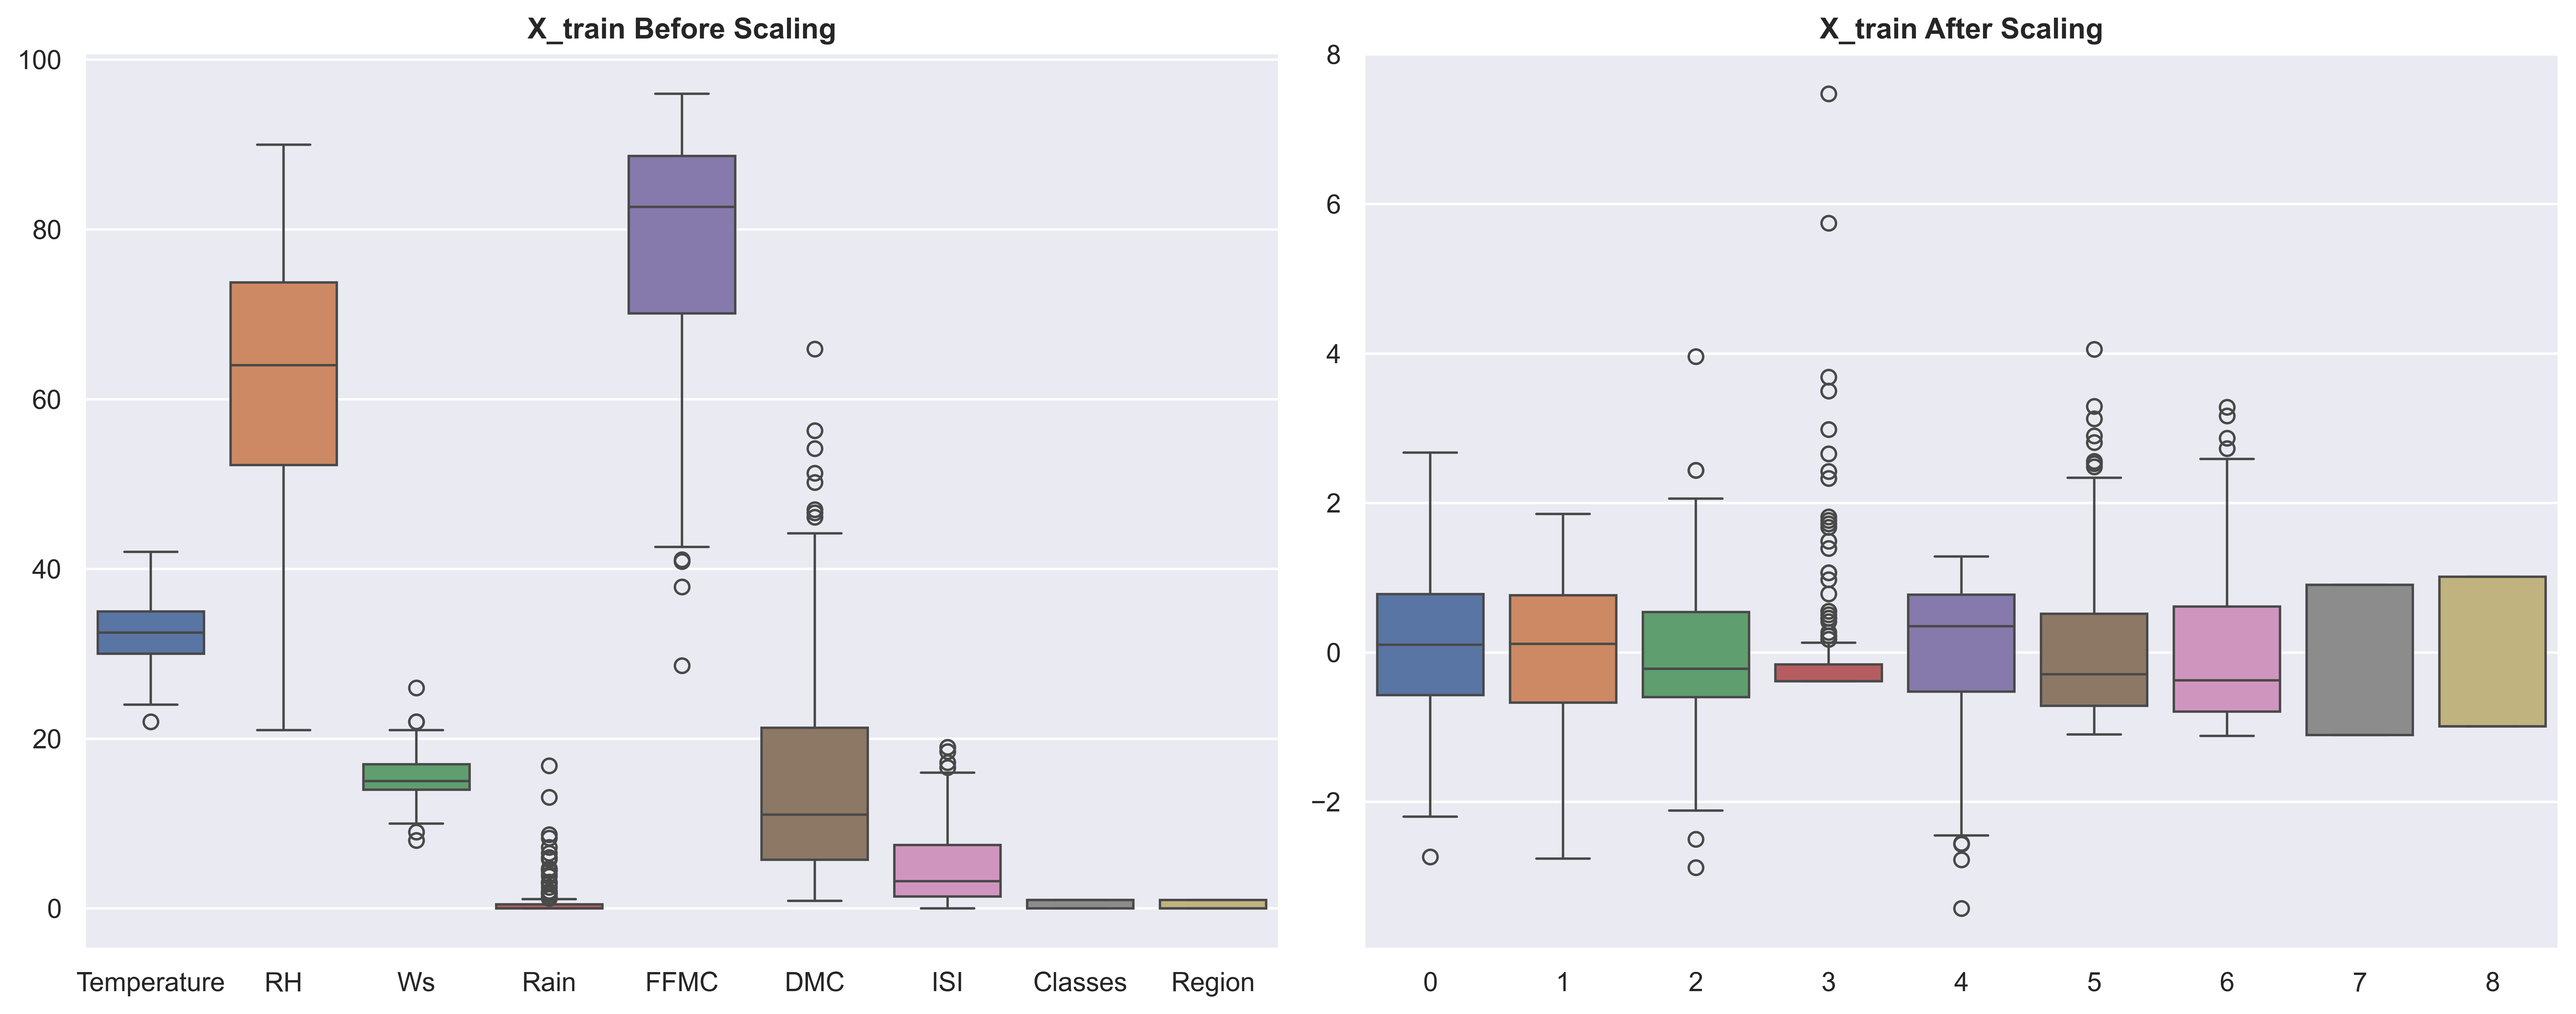

In [505]:
plt.figure(figsize=(15,6),dpi=600)
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling',weight='bold')

plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling',weight='bold')
plt.tight_layout()
plt.show()


RMSE :  0.82
MAE :  0.55
Accuracy :  0.98


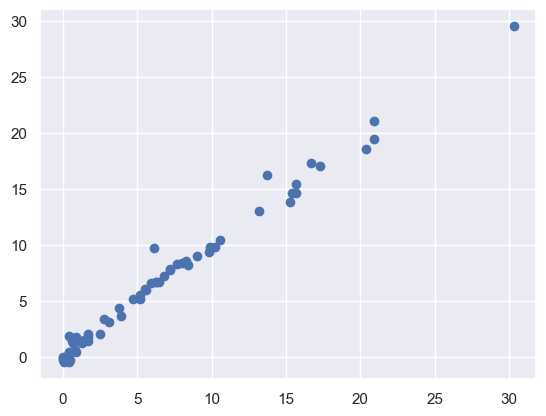

In [506]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error as rmse, mean_absolute_error as mae, r2_score as score
linReg = LinearRegression(n_jobs=-1)
linReg.fit(X_train_scaled,y_train)
y_pred = linReg.predict(X_test_scaled)
rmse = rmse(y_test,y_pred)
mae = mae(y_test,y_pred)
score = score(y_test,y_pred)

print('RMSE : ', round(rmse,2))
print('MAE : ',round(mae,2))
print('Accuracy : ', round(score,2))

plt.scatter(y_test,y_pred)
plt.show()

RMSE :  1.5
MAE :  1.13
Accuracy :  0.95


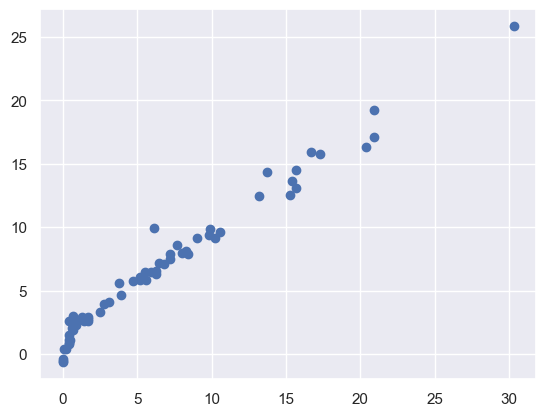

In [507]:
from sklearn.linear_model import Lasso
from sklearn.metrics import root_mean_squared_error as rmse, mean_absolute_error as mae, r2_score as score
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
rmse = rmse(y_test,y_pred)
mae = mae(y_test,y_pred)
score = score(y_test,y_pred)

print('RMSE : ', round(rmse,2))
print('MAE : ',round(mae,2))
print('Accuracy : ', round(score,2))

plt.scatter(y_test,y_pred)
plt.show()

RMSE :  0.83
MAE :  0.56
Accuracy :  0.98


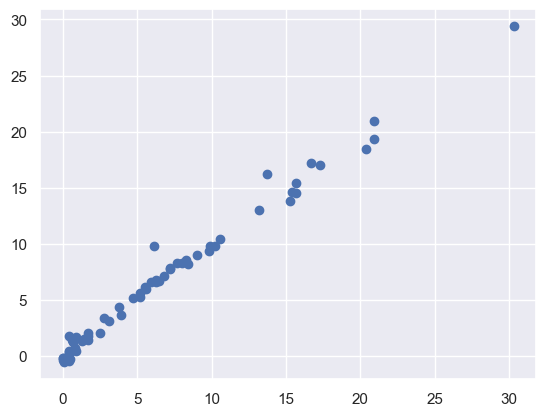

In [508]:
from sklearn.linear_model import Ridge
from sklearn.metrics import root_mean_squared_error as rmse, mean_absolute_error as mae, r2_score as score
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
rmse = rmse(y_test,y_pred)
mae = mae(y_test,y_pred)
score = score(y_test,y_pred)

print('RMSE : ', round(rmse,2))
print('MAE : ',round(mae,2))
print('Accuracy : ', round(score,2))

plt.scatter(y_test,y_pred)
plt.show()

RMSE :  2.35
MAE :  1.88
Accuracy :  0.88


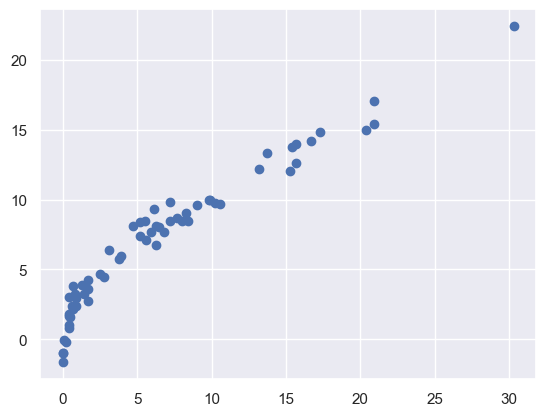

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import root_mean_squared_error as rmse, mean_absolute_error as mae, r2_score as score
elastic_net = ElasticNet()
elastic_net.fit(X_train_scaled,y_train)
y_pred = elastic_net.predict(X_test_scaled)
rmse = rmse(y_test,y_pred)
mae = mae(y_test,y_pred)
score = score(y_test,y_pred)

print('RMSE : ', round(rmse,2))
print('MAE : ',round(mae,2))
print('Accuracy : ', round(score,2))

plt.scatter(y_test,y_pred)
plt.show()


RMSE :  0.89
MAE :  0.62
Accuracy :  0.982


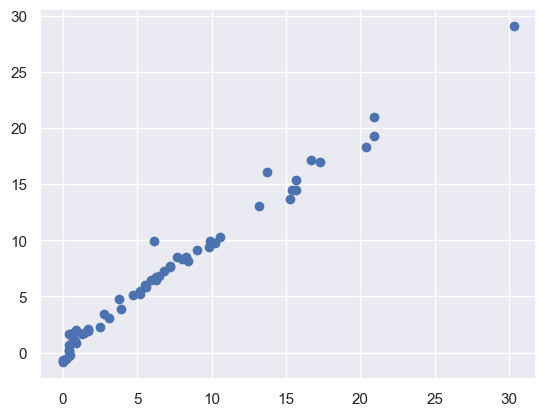

In [516]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import root_mean_squared_error as rmse, mean_absolute_error as mae, r2_score as score
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train_scaled,y_train)
y_pred = lasso_cv.predict(X_test_scaled)
rmse = rmse(y_test,y_pred)
mae = mae(y_test,y_pred)
score = score(y_test,y_pred)

print('RMSE : ', round(rmse,3))
print('MAE : ',round(mae,3))
print('Accuracy : ', round(score,3))

plt.scatter(y_test,y_pred)
plt.show()

In [513]:
print(lasso_cv.alpha_)

0.05725391318234408


In [514]:
print(lasso_cv.alphas_)

[7.05853002 6.58280872 6.13914944 5.72539132 5.33951911 4.97965339
 4.64404142 4.33104857 4.03915039 3.76692517 3.51304702 3.27627941
 3.05546914 2.84954075 2.65749124 2.47838523 2.31135036 2.15557308
 2.01029467 1.87480753 1.74845178 1.63061198 1.52071419 1.41822315
 1.32263965 1.23349817 1.15036452 1.0728338  1.00052839 0.93309613
 0.87020857 0.81155943 0.75686304 0.705853   0.65828087 0.61391494
 0.57253913 0.53395191 0.49796534 0.46440414 0.43310486 0.40391504
 0.37669252 0.3513047  0.32762794 0.30554691 0.28495408 0.26574912
 0.24783852 0.23113504 0.21555731 0.20102947 0.18748075 0.17484518
 0.1630612  0.15207142 0.14182231 0.13226397 0.12334982 0.11503645
 0.10728338 0.10005284 0.09330961 0.08702086 0.08115594 0.0756863
 0.0705853  0.06582809 0.06139149 0.05725391 0.05339519 0.04979653
 0.04644041 0.04331049 0.0403915  0.03766925 0.03513047 0.03276279
 0.03055469 0.02849541 0.02657491 0.02478385 0.0231135  0.02155573
 0.02010295 0.01874808 0.01748452 0.01630612 0.01520714 0.01418

In [515]:
print(lasso_cv.mse_path_)

[[53.64536329 65.39074075 54.89628985 77.90299066 39.38236846]
 [46.99139716 59.81506814 49.29840831 75.6645852  35.31758355]
 [41.14908917 53.9178721  42.49594889 68.35708298 31.76996123]
 [36.05788169 48.41773965 36.66879347 61.92819453 28.67296816]
 [31.62067285 42.76466229 31.68391904 56.26841266 24.93183295]
 [27.75285367 37.81922812 27.42599138 51.28216115 21.56888645]
 [24.3807738  33.49107651 23.7950306  45.25481907 18.66094162]
 [21.44052804 29.70161639 20.70460191 39.90418045 16.14837778]
 [18.876308   26.38208059 18.07969934 35.23429953 13.97821475]
 [16.63960395 23.47341883 15.85530749 31.15712074 12.10483403]
 [14.68819307 20.92329068 13.97555108 27.59649208 10.48862803]
 [12.98525144 18.68636627 12.39173305 24.48611006  9.09521221]
 [11.49893734 16.72312788 11.06186319 21.7677198   7.89445038]
 [10.2013182  14.9991189   9.94965275 19.39216316  6.86106557]
 [ 9.06814642 13.48429046  9.02375611 17.31505177  5.9722389 ]
 [ 8.0783105  12.15220147  8.25686268 15.49825178  5.20

RMSE :  0.834
MAE :  0.564
Accuracy :  0.984


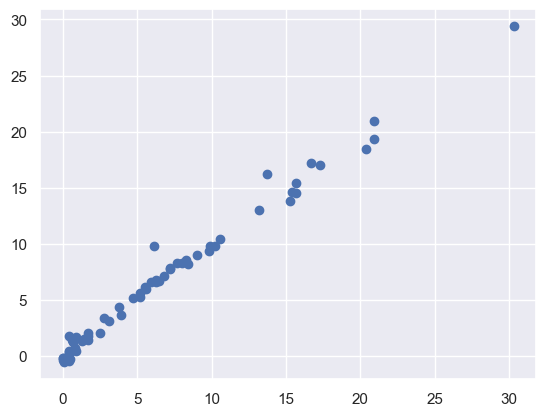

In [525]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import root_mean_squared_error as rmse, mean_absolute_error as mae, r2_score as score
ridge_cv = RidgeCV(cv=5)
ridge_cv.fit(X_train_scaled,y_train)
y_pred = ridge_cv.predict(X_test_scaled)
rmse = rmse(y_test,y_pred)
mae = mae(y_test,y_pred)
score = score(y_test,y_pred)

print('RMSE : ', round(rmse,3))
print('MAE : ',round(mae,3))
print('Accuracy : ', round(score,3))

plt.scatter(y_test,y_pred)
plt.show()

In [526]:
print(ridge_cv.alpha_)

1.0


In [530]:
ridge_cv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

RMSE :  0.907
MAE :  0.658
Accuracy :  0.981


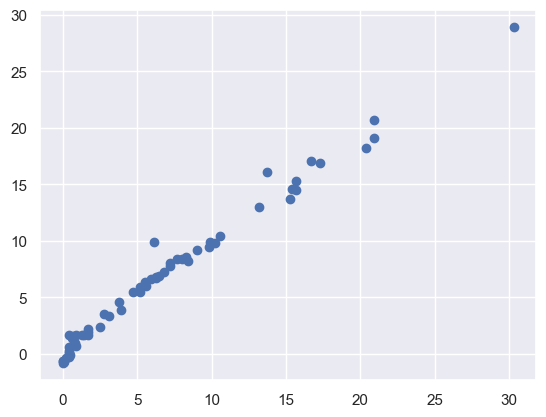

In [517]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import root_mean_squared_error as rmse, mean_absolute_error as mae, r2_score as score
elastic_cv = ElasticNetCV(cv=5)
elastic_cv.fit(X_train_scaled,y_train)
y_pred = elastic_cv.predict(X_test_scaled)
rmse = rmse(y_test,y_pred)
mae = mae(y_test,y_pred)
score = score(y_test,y_pred)

print('RMSE : ', round(rmse,3))
print('MAE : ',round(mae,3))
print('Accuracy : ', round(score,3))

plt.scatter(y_test,y_pred)
plt.show()

In [522]:
print(elastic_cv.alpha_)


0.04311146156383891


In [523]:
print(elastic_cv.alphas_)

[14.11706004 13.16561744 12.27829889 11.45078264 10.67903821  9.95930678
  9.28808283  8.66209714  8.07830078  7.53385034  7.02609405  6.55255882
  6.11093829  5.6990815   5.31498248  4.95677045  4.62270071  4.31114616
  4.02058933  3.74961507  3.49690356  3.26122397  3.04142839  2.83644629
  2.64527931  2.46699633  2.30072904  2.1456676   2.00105679  1.86619226
  1.74041714  1.62311885  1.51372607  1.411706    1.31656174  1.22782989
  1.14507826  1.06790382  0.99593068  0.92880828  0.86620971  0.80783008
  0.75338503  0.7026094   0.65525588  0.61109383  0.56990815  0.53149825
  0.49567705  0.46227007  0.43111462  0.40205893  0.37496151  0.34969036
  0.3261224   0.30414284  0.28364463  0.26452793  0.24669963  0.2300729
  0.21456676  0.20010568  0.18661923  0.17404171  0.16231189  0.15137261
  0.1411706   0.13165617  0.12278299  0.11450783  0.10679038  0.09959307
  0.09288083  0.08662097  0.08078301  0.0753385   0.07026094  0.06552559
  0.06110938  0.05699082  0.05314982  0.0495677   0.

In [524]:
print(elastic_cv.mse_path_)

[[53.99690233 65.39074075 54.89628985 77.90299066 43.34226941]
 [52.57580575 64.62234745 53.744793   77.60921421 42.30310502]
 [51.11104709 62.99703302 52.17649022 76.53887034 41.00613837]
 [49.61037668 61.26183674 50.57039748 74.67053859 39.67994098]
 [48.07677137 59.48562789 48.86189586 72.53190776 38.32743244]
 [46.08919463 57.21227804 46.85067587 69.99343362 36.64273851]
 [43.93304229 54.81307    44.65826477 67.19431714 34.65787048]
 [41.80546452 52.43573064 42.39238637 64.39190172 32.6541552 ]
 [39.71309973 50.06862734 40.16732063 61.6188179  30.67748611]
 [37.63649808 47.60730813 37.96880498 58.88319233 28.76304656]
 [35.48905272 45.2114555  35.74224936 56.09403417 26.91571606]
 [33.36370035 42.89274496 33.46771793 53.24006353 25.13971517]
 [31.29021796 40.65450553 31.2980323  50.46056554 23.40823907]
 [29.31299261 38.49931979 29.23545451 47.78188844 21.68975743]
 [27.43318227 36.42903573 27.28126827 45.20691722 20.06888131]
 [25.65110859 34.44479157 25.43581619 42.73763705 18.54

# PICKLE THE MACHINE LEARNING MODELS

In [532]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))